In [1]:
import earthkit

In [2]:
data = earthkit.data.from_source(
    "cds",
    'derived-utci-historical',
    {
        'version': '1_1',
        'variable': 'universal_thermal_climate_index',
        'product_type': 'consolidated_dataset',
        'year': '2022',
        'month': '07',
        'day': '27',
    }
)

In [3]:
style = earthkit.maps.styles.Contour(
    colors=[
        "#213965", "#1E4C76", "#2A669A", "#0171C2", "#45B3FF",
        "#DAF1A4", "#FF8C01", "#FF4601", "#CE0101", "#8C0101",
    ],
    levels=[l+273.15 for l in [-100, -40, -27, -13, 0, 9, 26, 32, 38, 46, 100]],
    categories=[
        "extreme cold stress",
        "very strong cold stress",
        "strong cold stress",
        "moderate cold stress",
        "slight cold stress",
        "no thermal stress",
        "moderate heat stress",
        "strong heat stress",
        "very strong heat stress",
        "extreme heat stress",
    ],
    legend_type="disjoint",
)

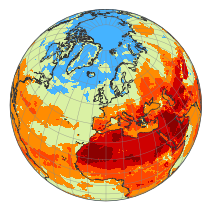

In [4]:
import cartopy.crs as ccrs

earthkit.maps.schema.figsize = (2, 2)
chart = earthkit.maps.Superplot(crs=ccrs.NearsidePerspective(central_latitude=50))

chart.plot(data[12], style=style, transform_first=False)
chart.stock_img()

chart.coastlines(resolution="medium")
chart.gridlines(
    draw_labels=False,
    xlocs=range(-180, 180, 10),
    ylocs=range(-90, 90, 10),
    ylim=80,
    linestyle="-",
    linewidth=0.3,
)

chart.save("overview.png")

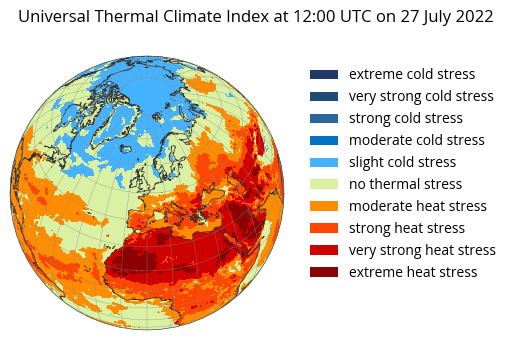

In [5]:
earthkit.maps.schema.figsize = (5, 3.5)
chart = earthkit.maps.Superplot(crs=ccrs.NearsidePerspective(central_latitude=50))

chart.plot(data[12], style=style, transform_first=False)
chart.stock_img()

chart.coastlines(resolution="medium")
chart.gridlines(
    draw_labels=False,
    xlocs=range(-180, 180, 10),
    ylocs=range(-90, 90, 10),
    ylim=80,
    linestyle="-",
    linewidth=0.3,
)

chart.legend(label="", location="right")
chart.title("Universal Thermal Climate Index at {time:%H:%M} UTC on {time:%-d %B %Y}")

chart.save("overview-detail.png")